<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans Project-Mall Customer

### K-means is a popular clustering algorithm used in machine learning and data analysis. Its main goal is to partition a dataset into distinct groups or clusters based on the similarity of data points.

Here's a simple and brief overview of how the K-means algorithm works:


1-Initialization: Choose the number of clusters (K) you want to identify in your dataset. Randomly initialize K cluster centroids, which are points in the feature space.

2-Assignment: Assign each data point to the cluster whose centroid is closest to it. The distance measure commonly used is Euclidean distance.

3-Update Centroids: Recalculate the centroids of each cluster by taking the mean of all data points assigned to that cluster.

4-Repeat: Repeat steps 2 and 3 until convergence. Convergence occurs when the assignments of data points to clusters no longer change significantly or when a predetermined number of iterations is reached.

5-Result: The final cluster assignments and centroids represent the identified clusters in the dataset.


## About Dataset:
/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv

This file contains the basic information (ID, age, gender, income, spending score) about the customers

1-CustomerID
Unique ID assigned to the customer

2-Gender
Gender of the customer

3-Age
Age of the customer

4-Annual Income (k$)
Annual Income of the customee

5-Spending Score (1-100)
Score assigned by the mall based on customer behavior and spending nature


## Import libraries

In [24]:
import pandas as pd
import numpy as np
from numpy import unique
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Clean Data

In [9]:
df = df.drop('CustomerID',axis =1)

## Visualization

### Distribution Plot

<Figure size 1000x800 with 0 Axes>

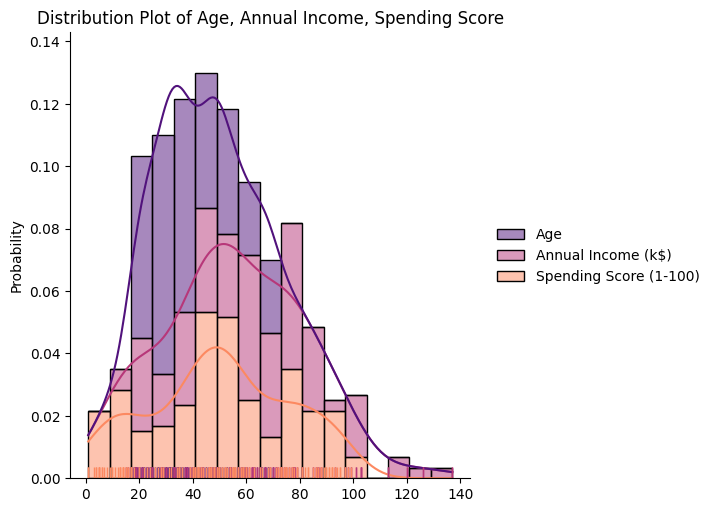

In [10]:
plt.figure(figsize=(10,8))
sns.displot(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']],multiple='stack',kde=True,palette='magma',rug=True,stat='probability')
plt.title('Distribution Plot of Age, Annual Income, Spending Score')
plt.show()


## From this graph, we can analyze several aspects:


*   The distribution of age appears to be somewhat normally distributed, with a peak somewhere around 30-40 years.

*   Annual income shows a distribution that has multiple peaks, suggesting multiple groups within the dataset with different income levels.

*   The spending score is also somewhat normally distributed, with a peak around the 50 score mark.









## Count Plot

<ipython-input-11-5dd02ab9700e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette='Set2')


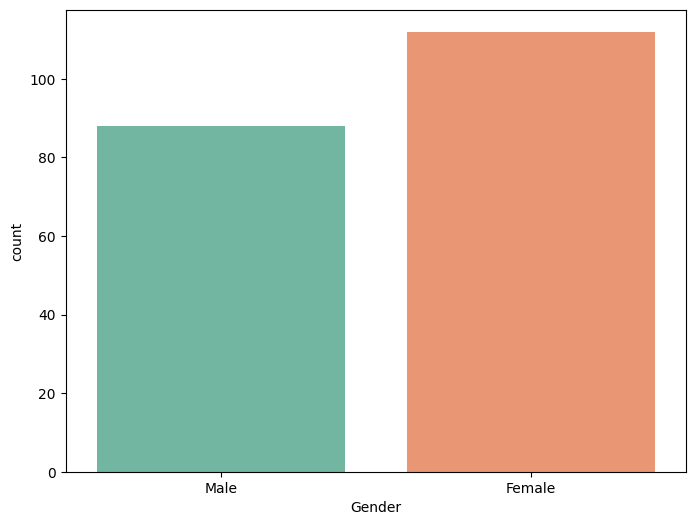

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Gender',palette='Set2')
plt.show()

## Pair Plot

<Figure size 1600x800 with 0 Axes>

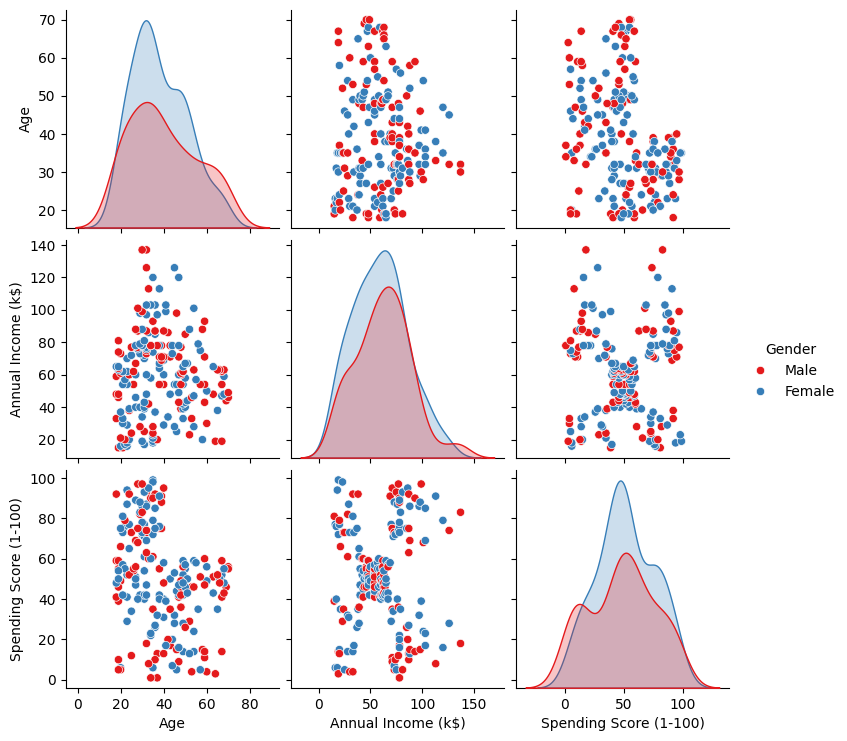

In [12]:
plt.figure(figsize=(16,8))
sns.pairplot(data=df,hue='Gender',palette='Set1')
plt.show();

## Analysis:

*   The Age distribution shows two peaks, suggesting two age groups are predominant in this dataset.

*   The Annual Income distribution is more uniform with a slight peak around the mid-range scores.

*   The Spending Score distribution also shows a roughly bimodal distribution, indicating two major income groups.

*   Looking at the scatterplots, it seems there is no clear linear relationship between Age and Annual Income, nor between Age and Spending Score.

*   There might be a more complex relationship between Annual Income and Spending Score, as the scatterplot shows some clustering.












## Heat Map

<ipython-input-13-6b79bd5c4cc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


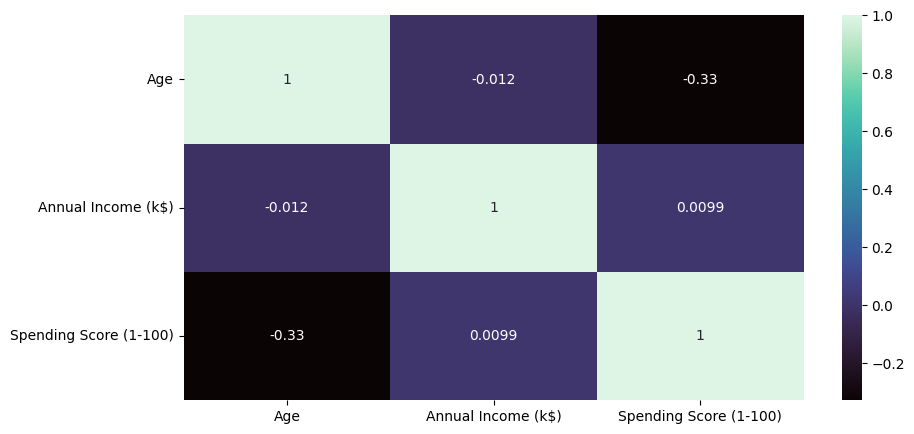

In [13]:
plt.figure(figsize=(10, 5))
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap = 'mako')
plt.show()

## Analysis:

*   The correlation between Gender and Age is -0.061, which suggests a very weak negative correlation.
*   The correlation between Gender and Annual Income is -0.056, also indicating a very weak negative correlation.
*   The correlation between Gender and Spending Score is 0.058, suggesting a very weak positive correlation.
*   The correlation between Age and Annual Income is -0.012, suggesting almost no correlation.
*   The correlation between Age and Spending Score is -0.33, indicating a moderate negative correlation; as age increases, spending score tends to decrease.
*   The correlation between Annual Income and Spending Score is 0.0099, suggesting no real correlation between these two variables.












## Build KMeans Model

In [18]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

## Use Elbow method to choose the best k:

### The KElbowVisualizer is a tool from the yellowbrick library in Python, which is designed to assist in the application of the elbow method to the k-means clustering algorithm. It provides a visual representation to help identify the optimal number of clusters (k) for k-means clustering. The KElbowVisualizer automates the process of running the k-means algorithm with varying numbers of clusters and plotting the results, making it easier to spot the "elbow" point.

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

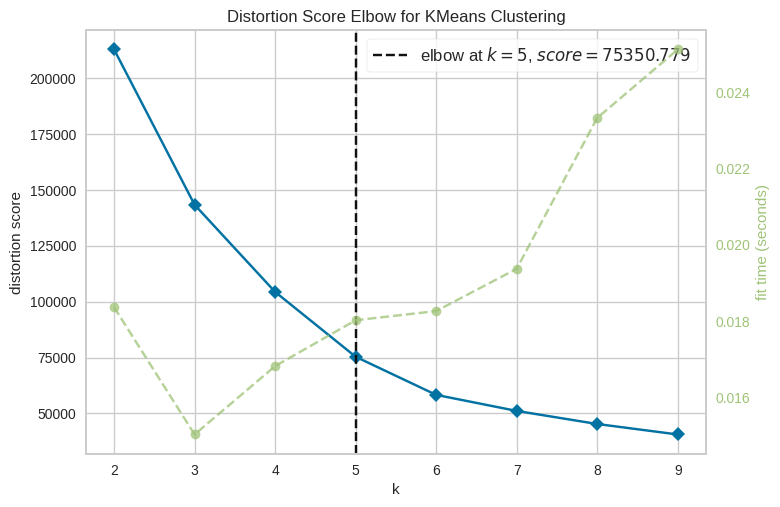

In [25]:
vis = KElbowVisualizer(KMeans(),k=(2,10))
vis.fit(X)
vis.poof()
plt.show()

## Analysis:

### The first plot is the Distortion Score Elbow for KMeans Clustering. This plot shows the distortion score (which is a sum of the squared distances from each point to its assigned center) on the left vertical axis and the number of clusters (k) on the horizontal axis. The right vertical axis represents the time taken for the algorithm to fit the data (fit time in seconds), which is plotted with a dashed line. The elbow method looks for a k at which the distortion score begins to decrease more slowly. This 'elbow' is often considered to be a good choice for k because it represents a point of diminishing returns where increasing k further does not provide a significant improvement in the clustering. In this graph, the elbow is identified at k=5 with a score of 75350.779, which suggests that 5 is a suitable number of clusters for the data.

## Silhouette Score:

### The silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.



In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

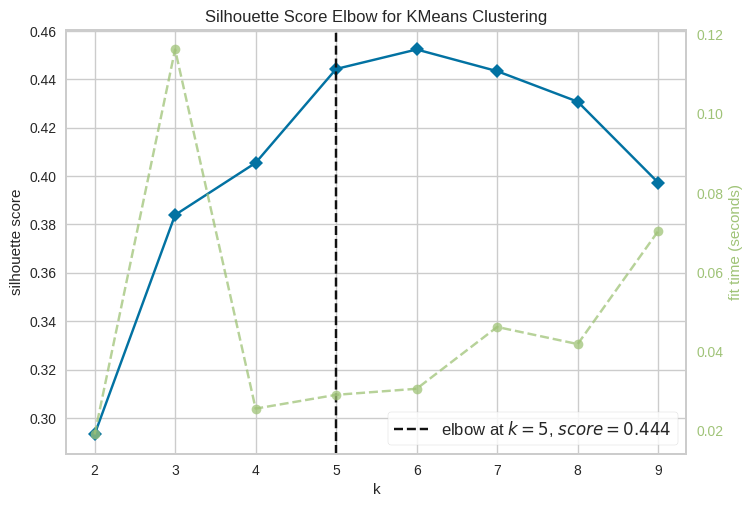

In [35]:
vis = KElbowVisualizer(KMeans(random_state=101),k=(2,10),metric='silhouette')
vis.fit(X)
vis.show()
plt.show()

## Analysis:

### The second plot is the Silhouette Score Elbow for KMeans Clustering. This plot shows the silhouette score on the left vertical axis against the number of clusters (k) on the horizontal axis, with the fit time again on the right vertical axis. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Therefore, a higher silhouette score is generally better. In this plot, the highest silhouette score is at k=5 with a score of 0.444, which suggests that the data points are on average closer to their own cluster center than to other cluster centers.

* Both plots suggest that k=5 is the optimal number of clusters for this dataset, based on both the distortion score and the silhouette score.

## To get the overall silhouette score for a set of clusters, average the silhouette score for all samples. The optimal number of clusters k is often considered to be the one that maximizes the overall silhouette score.

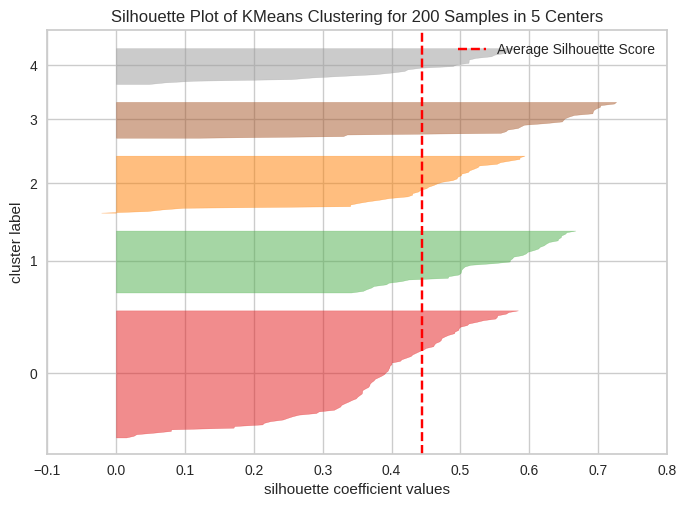

In [36]:
sil_vis = SilhouetteVisualizer(KMeans(5))
sil_vis.fit(X)
sil_vis.show()
plt.show()

In [38]:
km = KMeans(init="k-means++", n_clusters= 5)
km.fit(X)

KMeans(n_clusters=5)


*   "k-means++": This is the default initialization method in most KMeans implementations. It is an algorithm to initialize the cluster centers before moving forward with the standard k-means clustering algorithm. The goal of k-means++ is to spread out the initial centroids of the clusters. The first centroid is chosen randomly from the data points, and each subsequent centroid is chosen from the remaining data points with probability proportional to its squared distance from the nearest existing centroid. This probabilistic approach tends to select centroids that are spread out across the data, which often leads to better and faster convergence of the k-means algorithm compared to random initialization.




In [40]:
df['KM_Cluster']=km.labels_
KM_centres=km.cluster_centers_

1- df['KM_Cluster'] = K_means.labels_:

*  K_means.labels_ is an attribute of the fitted KMeans object K_means. It contains the labels of the cluster for each data point in the dataset that was used to fit the model. These labels are integers ranging from 0 to n_clusters-1.

*   df['KM_Cluster'] creates a new column in the DataFrame df named 'KM_Cluster', or if it already exists, it will overwrite the current values.
*   The assignment df['KM_Cluster'] = K_means.labels_ places the cluster label for each data point into this new column. Essentially, it's adding the results of the clustering process to the original dataset as a new feature indicating the cluster to which each record belongs.

2- KM_centres = K_means.cluster_centers_:

*   K_means.cluster_centers_ is another attribute of the fitted KMeans object. It contains the coordinates of the cluster centers. If you have a dataset with d dimensions and you've chosen to create k clusters, K_means.cluster_centers_ will be a NumPy array with dimensions k x d.
*   KM_centres is simply a variable that is assigned the coordinates of the cluster centers. This can be useful if you want to inspect the centers, use them for further analysis, or plot them for visualization purposes.



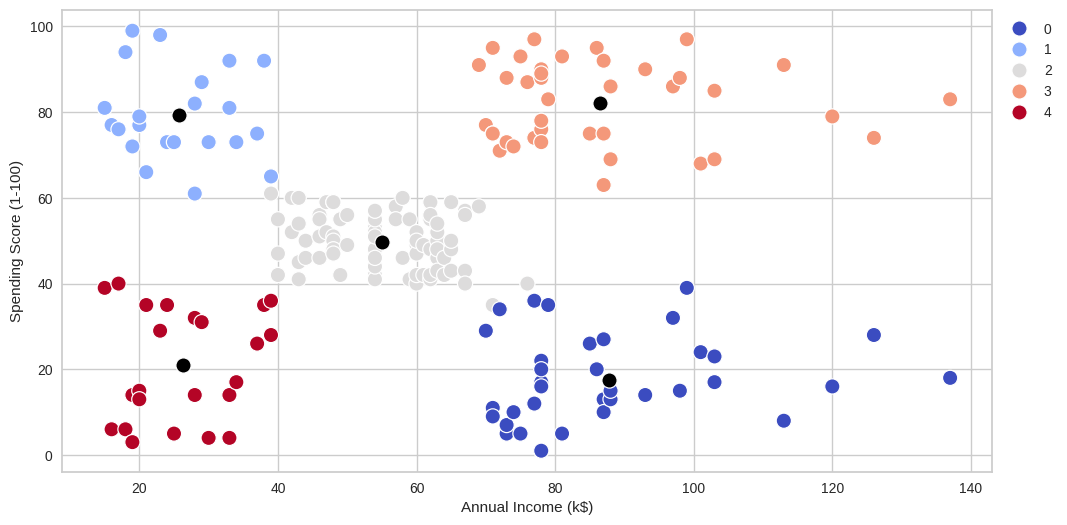

In [51]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='KM_Cluster',palette='coolwarm',s=120)
ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()


*   ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black'):

*   This line also creates a scatter plot and plots it on the same axis object ax to overlay on the previous plot.

*   x=KM_centres[:,1] and y=KM_centres[:,2] specify the x and y coordinates of the cluster centers. It assumes that KM_centres is a 2D array where the second column (index 1) represents 'Annual Income' and the third column (index 2) represents 'Spending Score'.






## Result:


*   Cluster Characteristics: The clusters have been formed based on the spending score and annual income. For instance, one cluster (in red) groups together individuals with low annual income and low spending scores, while another cluster (in blue) groups those with high annual income and high spending scores. The cluster in grey appears to capture those with moderate annual incomes and moderate-to-high spending scores.
*   Cluster Distribution: We can observe that individuals with lower incomes have a wider range of spending scores, while those with higher incomes seem to have a narrower range of higher spending scores.



**   From a business perspective, this kind of clustering might help a company to target different customer segments with appropriate marketing strategies. For example, individuals in the cluster with high income and high spending scores could be targeted with luxury goods, while those in the cluster with low income and high spending scores might be more sensitive to promotions and discounts.




